# Assignment for Populations Dynamics
Fish 6001
Muriel Dunn
October 09 2019

Find estimates of r and u based on Atlantic Halibut landing data using a surplus population model.

In [85]:
# Import toolboxes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize as op

## Import landings/year data 

In [52]:
fname = '../data/Halibut_Landings.csv'
#Import landings and year
data = pd.read_csv(fname, header=0, usecols=[0,1])
T= data.values[:,0]
L = data.values[:,1]

## Initial conditions

In [53]:
Bo = 2000 #t
K = 75000 #t

## Make Schaefer model

In [171]:
def schaefer(params, L, Bo, K):
    # The schaefer model is a suprlus population model used to interatively estimare biomass based on fishing efforts 
    # and recruitment/growth/natural mortality.
    
    # Allocate space for results
    B = np.empty(np.size(T))
    c = np.empty(np.size(T))
    #ssq = np.empty(size(T))
    
    r = params[0]
    u = params[1]
    
    
    # Calculate first time step
    B[0] = Bo
    c[0] = u * Bo #Catch
    
    for t in np.arange(np.size(T)-1):
        B[t+1] = B[t] + r*B[t]*(1-(B[t]/K)) - (u*B[t])
        
    c = u*B

    ssq = np.square((L-c))
    sum_ssq = np.sum(ssq)
    
    return  sum_ssq,c,B
    #return sum_ssq  # Use when runnign optimizer

## Optimize schaefer function to find optimal r and u
Use python version of R optim from scipy package.


In [172]:
res = op.minimize(schaefer,[0.5,0,5], args=(L,Bo,K), method='Nelder-Mead')
print(res)

 final_simplex: (array([[  0.15183524,   0.06127879, -29.74531431],
       [  0.15183524,   0.06127877, -29.74536745],
       [  0.15183524,   0.0612788 , -29.74539299],
       [  0.15183523,   0.06127875, -29.74537272]]), array([336099.7392905 , 336099.73929054, 336099.73929056, 336099.7392906 ]))
           fun: 336099.73929050425
       message: 'Optimization terminated successfully.'
          nfev: 221
           nit: 122
        status: 0
       success: True
             x: array([  0.15183524,   0.06127879, -29.74531431])


In [175]:
r = res.x[0]
u = res.x[1]
print('r = %0.2f  u = %0.2f' %(r,u))

r = 0.15  u = 0.06


## Plot and asses the fitted values

In [154]:
sum_ssq,c,B= schaefer([r,u],L,Bo,K)

Text(0, 0.5, 'Catch (t)')

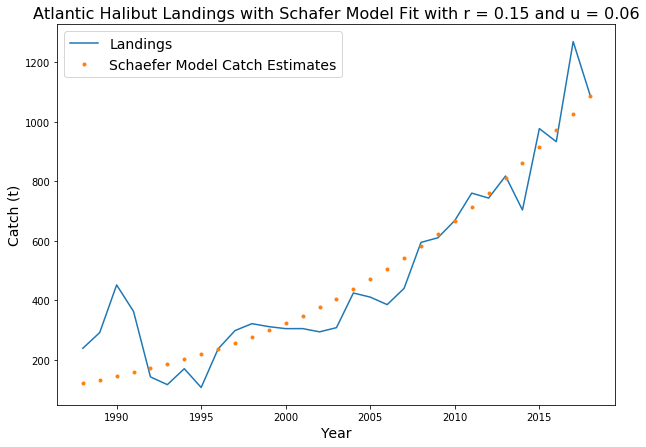

In [196]:
plt.figure(figsize=(10,7))
plt.plot(T,L,T,c,'.',)
plt.legend(['Landings', 'Schaefer Model Catch Estimates'], fontsize=14)
plt.title('Atlantic Halibut Landings with Schafer Model Fit with r = %0.2f and u = %0.2f' %(r,u), fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Catch (t)', fontsize=14)

Text(0, 0.5, 'Landings (t)')

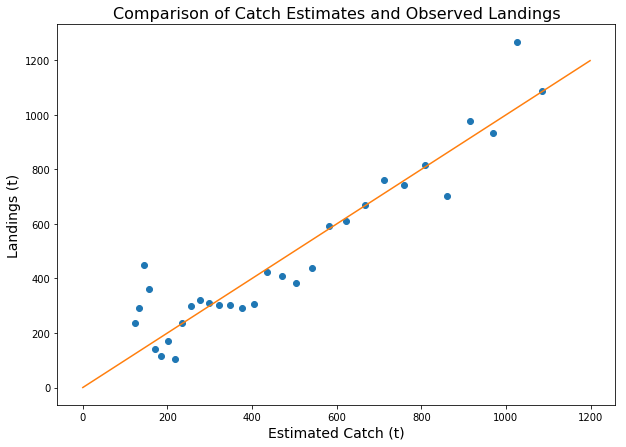

In [199]:
plt.figure(figsize=(10,7))
plt.plot(c,L,'o',np.arange(1200), np.arange(1200))
plt.title('Comparison of Catch Estimates and Observed Landings', fontsize=16)
plt.xlabel('Estimated Catch (t)', fontsize=14)
plt.ylabel('Landings (t)',fontsize=14)

## Calculate Maxiumum Sustainable Yield parameters

In [177]:
msy = r*K/4
U_msy = r/2
B_msy = K/2
print('MSY = %4.2f  U_msy = %0.3f  B_msy = %5.0f' %(msy,U_msy,B_msy))

MSY = 2846.91  U_msy = 0.076  B_msy = 37500


In [185]:
B[-1]/B_msy
B[-2]/B_msy

#Catch(t) = U*B(t)
(c[-1]/B[-1])/U_msy
(c[-2]/B[-2])/U_msy

0.8071748588892829